In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [6]:
df = pd.read_csv('./datasets/pima_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

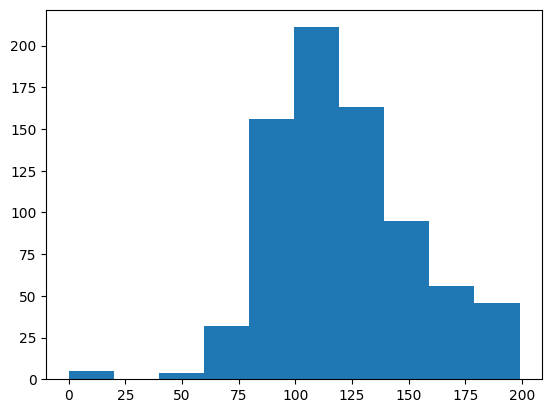

In [7]:
plt.hist(df['Glucose'], bins=10)

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

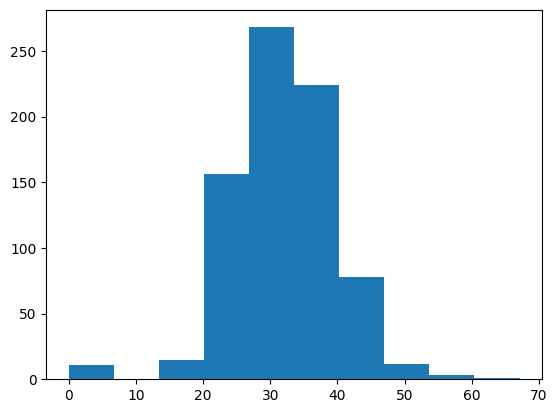

In [9]:
plt.hist(df['BMI'], bins=10)

In [8]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
y = df['Outcome']

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [15]:
X_df = pd.DataFrame(X, columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])

In [28]:
X_df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00
25%,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01
50%,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04
75%,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01
max,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00


(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([-4.06047387, -3.20884574, -2.3572176 , -1.50558946, -0.65396133,
         0.19766681,  1.04929495,  1.90092308,  2.75255122,  3.60417935,
         4.45580749]),
 <BarContainer object of 10 artists>)

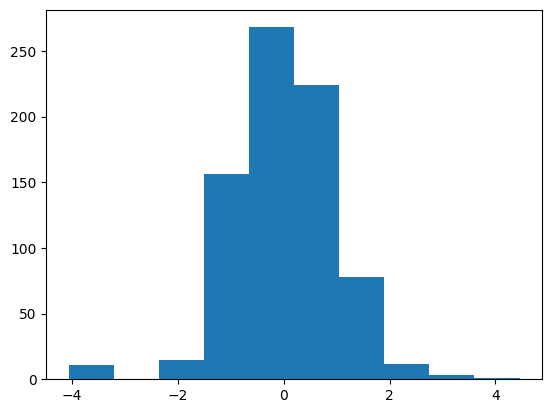

In [17]:
plt.hist(X_df['BMI'], bins=10)

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([-3.78365371, -3.16084052, -2.53802733, -1.91521414, -1.29240095,
        -0.66958775, -0.04677456,  0.57603863,  1.19885182,  1.82166501,
         2.44447821]),
 <BarContainer object of 10 artists>)

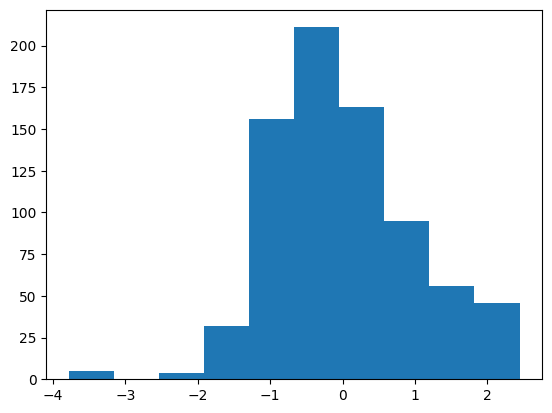

In [18]:
plt.hist(X_df['Glucose'], bins=10)

In [29]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=42)

In [30]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [31]:
dt_pred_proba = dt.predict_proba(X_test)

In [33]:
fpr, tpr, threshold = roc_curve(y_test, dt_pred_proba[:,1])

In [48]:
dt = DecisionTreeClassifier(max_depth=7, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [56]:
from sklearn.tree import export_text

r = export_text(dt, feature_names=['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI'])
print(r)

|--- Glucose <= 0.71
|   |--- BMI <= -0.41
|   |   |--- Glucose <= -0.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  -0.50
|   |   |   |--- BMI <= -0.74
|   |   |   |   |--- Glucose <= 0.12
|   |   |   |   |   |--- Glucose <= -0.41
|   |   |   |   |   |   |--- BloodPressure <= -0.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- BloodPressure >  -0.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Glucose >  -0.41
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Glucose >  0.12
|   |   |   |   |   |--- BloodPressure <= -0.65
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- BloodPressure >  -0.65
|   |   |   |   |   |   |--- BMI <= -2.81
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- BMI >  -2.81
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- BMI >  -0.74
|   |   |   |   |--- Glucose <= -0.44
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  -0.44
|   |   |   |  

In [57]:
dt.feature_importances_

array([0.55596024, 0.13605237, 0.02557231, 0.07489539, 0.2075197 ])

In [49]:
dt_pred_proba_1 = dt.predict_proba(X_test)

In [50]:
fpr_1, tpr_1, threshold_1 = roc_curve(y_test, dt_pred_proba_1[:,1])

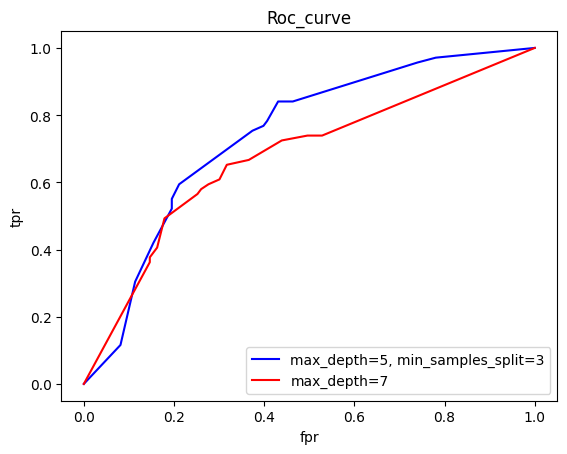

In [51]:
plt.title("Roc_curve")

plt.xlabel("fpr")
plt.ylabel("tpr")
plt.plot(fpr, tpr, "b", label = "max_depth=5, min_samples_split=3")
plt.plot(fpr_1, tpr_1, "r", label = "max_depth=7")
plt.legend(loc = "lower right")
plt.show()

In [52]:
auc_1 = roc_auc_score(y_test, dt_pred_proba[:,1])
auc_2 = roc_auc_score(y_test, dt_pred_proba_1[:,1])

In [53]:
auc_1

0.7401908801696713

In [54]:
auc_2

0.6767998114763756